`02_pandas3.ipynb`

# 시계열 데이터 (Time Series Data)

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
date_strings = [
    '2023-01-15',
    '15/01/2023', 
    'Jan 15, 2023',
    '2023.01.15',
    '15-Jan-2023',
    '20230115',
    '2025/08/05'
]

for date in date_strings:
    # 예외 처리(에러 처리)
    try: # 일단 되면 해봄
        parsed = pd.to_datetime(date)
        print(f'{date} -> {parsed}')
    except: # 안되면 이 코드를 실행
        print(date)

2023-01-15 -> 2023-01-15 00:00:00
15/01/2023 -> 2023-01-15 00:00:00
Jan 15, 2023 -> 2023-01-15 00:00:00
2023.01.15 -> 2023-01-15 00:00:00
15-Jan-2023 -> 2023-01-15 00:00:00
20230115 -> 2023-01-15 00:00:00
2025/08/05 -> 2025-08-05 00:00:00


In [3]:
# 시계열 인덱스 생성
# 날짜 범위 생성
dates_daily = pd.date_range('2023-01-01', '2023-12-31', freq='D')
dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='M')
dates_weekly = pd.date_range('2023-01-01', '2023-12-31', freq='W')

print(f"\n일별 날짜 (총 {len(dates_daily)}개): {dates_daily[:5].tolist()}...")
print(f"월별 날짜 (총 {len(dates_monthly)}개): {dates_monthly.tolist()}")
print(f"주별 날짜 (총 {len(dates_weekly)}개): {dates_weekly[:5].tolist()}...")

# 시계열 데이터프레임 생성
np.random.seed(42)

# 일별 매출 데이터 생성
daily_sales = pd.DataFrame({
    'date': dates_daily,
    'sales': np.random.normal(100000, 20000, len(dates_daily)) + 
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 7) * 10000 +  # 주간 패턴
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 365) * 30000   # 연간 패턴
})

# 음수 값 제거
daily_sales['sales'] = daily_sales['sales'].clip(lower=10000)

# date를 인덱스로 설정
daily_sales.set_index('date', inplace=True)

print("\n일별 매출 데이터:")
print(daily_sales.head())


일별 날짜 (총 365개): [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-04 00:00:00'), Timestamp('2023-01-05 00:00:00')]...
월별 날짜 (총 12개): [Timestamp('2023-01-31 00:00:00'), Timestamp('2023-02-28 00:00:00'), Timestamp('2023-03-31 00:00:00'), Timestamp('2023-04-30 00:00:00'), Timestamp('2023-05-31 00:00:00'), Timestamp('2023-06-30 00:00:00'), Timestamp('2023-07-31 00:00:00'), Timestamp('2023-08-31 00:00:00'), Timestamp('2023-09-30 00:00:00'), Timestamp('2023-10-31 00:00:00'), Timestamp('2023-11-30 00:00:00'), Timestamp('2023-12-31 00:00:00')]
주별 날짜 (총 53개): [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-29 00:00:00')]...

일별 매출 데이터:
                    sales
date                     
2023-01-01  109934.283060
2023-01-02  105569.429486
2023-01-03  123735.698233
2023-01-04  136348.024536
2023-01-05   93042.167918


C:\Users\amonm\AppData\Local\Temp\ipykernel_6152\2779952191.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='M')


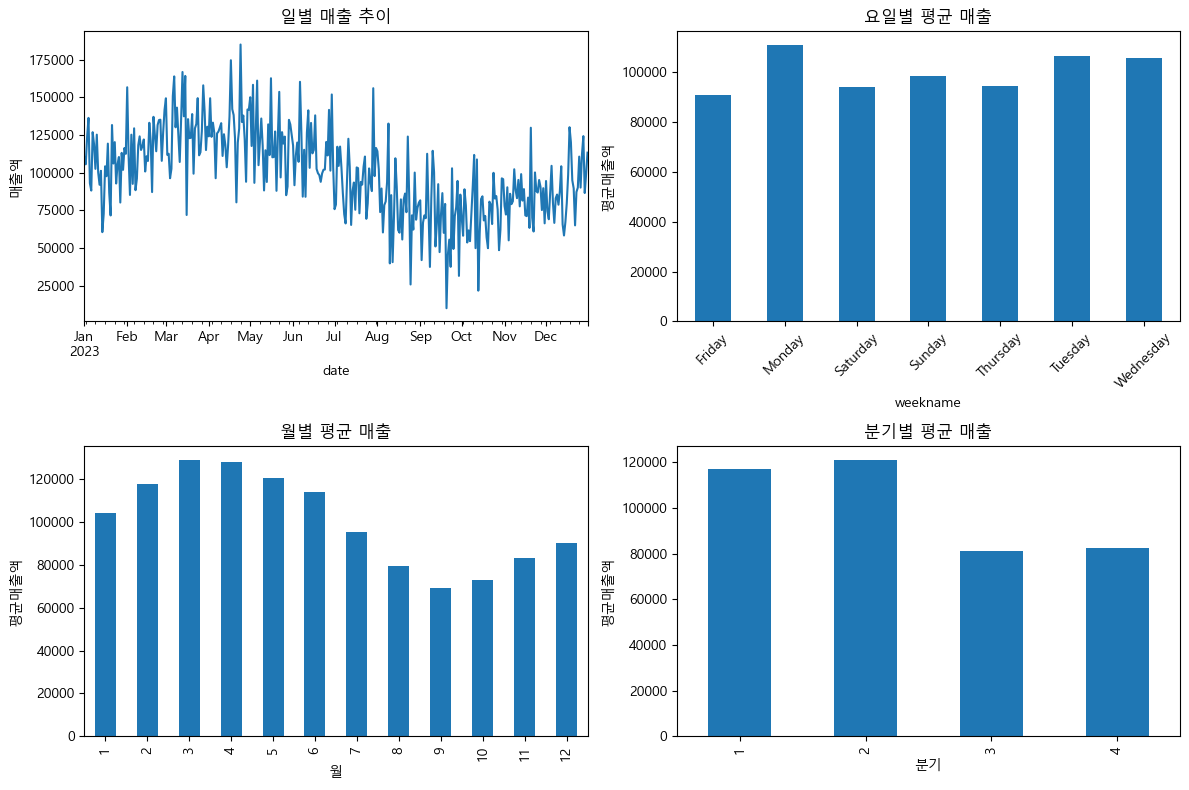

In [29]:
# Index (datetime index라서 바로 접근 가능 )

daily_sales['year'] = daily_sales.index.year # 년
daily_sales['month'] = daily_sales.index.month # 월
daily_sales['day'] = daily_sales.index.day # 일
daily_sales['weekday'] = daily_sales.index.weekday # 요일, 월 = 0
daily_sales['weekname'] = daily_sales.index.day_name() # 요일, 함수
daily_sales['quarter'] = daily_sales.index.quarter # 분기

daily_sales.head()

# 요일별 평균매출
weekday_avg = daily_sales.groupby('weekname')['sales'].mean()

# 원하는 순서대로 Series나 DF의 인덱스의 순서 바꾸기
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg.reindex(weekday_order)

# 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
daily_sales['sales'].plot()
plt.title('일별 매출 추이')
plt.ylabel('매출액')

# 요일별 평균 매출
plt.subplot(2, 2, 2)
weekday_avg.plot(kind='bar')
plt.title('요일별 평균 매출')
plt.ylabel('평균매출액')
plt.xticks(rotation=45)


# 월별 평균 매출
plt.subplot(2, 2, 3)
monthly_avg = daily_sales.groupby('month')['sales'].mean()
monthly_avg.plot(kind='bar')
plt.title('월별 평균 매출')
plt.xlabel('월')
plt.ylabel('평균매출액')

# 분기별 평균 매출
plt.subplot(2, 2, 4)
quarter_avg = daily_sales.groupby('quarter')['sales'].mean()
quarter_avg.plot(kind='bar')
plt.title('분기별 평균 매출')
plt.xlabel('분기')
plt.ylabel('평균매출액')


# 레이아웃 겹치지 않게 조정
plt.tight_layout()

plt.show()


In [30]:
# 인덱싱 및 슬라이싱
f'전체 데이터 기간 {daily_sales.index.min()} ~ {daily_sales.index.max()}'


'전체 데이터 기간 2023-01-01 00:00:00 ~ 2023-12-31 00:00:00'

In [32]:
# 특정 날짜 선택
d1 = daily_sales.loc['2023-01-15']
d1['sales']

np.float64(72661.82632991784)

In [50]:
# 날짜 범위 선택
jan_half = daily_sales['2023-01-01':'2023-01-15']
# 데이터개수, 매출 총합
len(jan_half), jan_half['sales'].sum()

(15, np.float64(1557048.692157083))

In [33]:
# 부분 문자열 활용
daily_sales.loc['2023-04']

,sales,year,month,day,weekday,weekname,quarter
date,,,,,,,
2023-04-01,124116.291222,2023,4,1,5,Saturday,2
2023-04-02,149372.622003,2023,4,2,6,Sunday,2
2023-04-03,123774.752707,2023,4,3,0,Monday,2
2023-04-04,133182.424610,2023,4,4,1,Tuesday,2
2023-04-05,126463.065796,2023,4,5,2,Wednesday,2
2023-04-06,96328.378472,2023,4,6,3,Thursday,2
2023-04-07,126072.893472,2023,4,7,4,Friday,2
2023-04-08,127255.949952,2023,4,8,5,Saturday,2
2023-04-09,129899.974611,2023,4,9,6,Sunday,2


In [ ]:
# 조건부 필터링(weekname column이 Friday)
daily_sales[daily_sales['weekname'] == 'Friday']

# 특정 월의 주말만(6월):

# 6월의 데이터만 뽑기
june = daily_sales.loc['2023-06']

# 6월의 토/일만 True mask
weekend_mask = daily_sales.loc['2023-06']['weekday'].isin([5, 6]) # 0 = 월


june[weekend_mask]

,sales,year,month,day,weekday,weekname,quarter
date,,,,,,,
2023-06-03,111414.940332,2023,6,3,5,Saturday,2
2023-06-04,119996.234696,2023,6,4,6,Sunday,2
2023-06-10,84019.290727,2023,6,10,5,Saturday,2
2023-06-11,126593.103997,2023,6,11,6,Sunday,2
2023-06-17,138027.509610,2023,6,17,5,Saturday,2
2023-06-18,102502.903094,2023,6,18,6,Sunday,2
2023-06-24,102089.477070,2023,6,24,5,Saturday,2
2023-06-25,120406.110304,2023,6,25,6,Sunday,2


In [ ]:
# 마지막 10일 간의 데이터 

daily_sales.tail(10)
# 연속성이 있기 때문에 확실하게 사용할 수 있음

,sales,year,month,day,weekday,weekname,quarter
date,,,,,,,
2023-12-22,65061.339260,2023,12,22,4,Friday,4
2023-12-23,87182.157836,2023,12,23,5,Saturday,4
2023-12-24,90108.464058,2023,12,24,6,Sunday,4
2023-12-25,110666.444684,2023,12,25,0,Monday,4
2023-12-26,90111.609327,2023,12,26,1,Tuesday,4
2023-12-27,112146.823714,2023,12,27,2,Wednesday,4
2023-12-28,124251.868065,2023,12,28,3,Thursday,4
2023-12-29,86526.927892,2023,12,29,4,Friday,4
2023-12-30,99183.271269,2023,12,30,5,Saturday,4


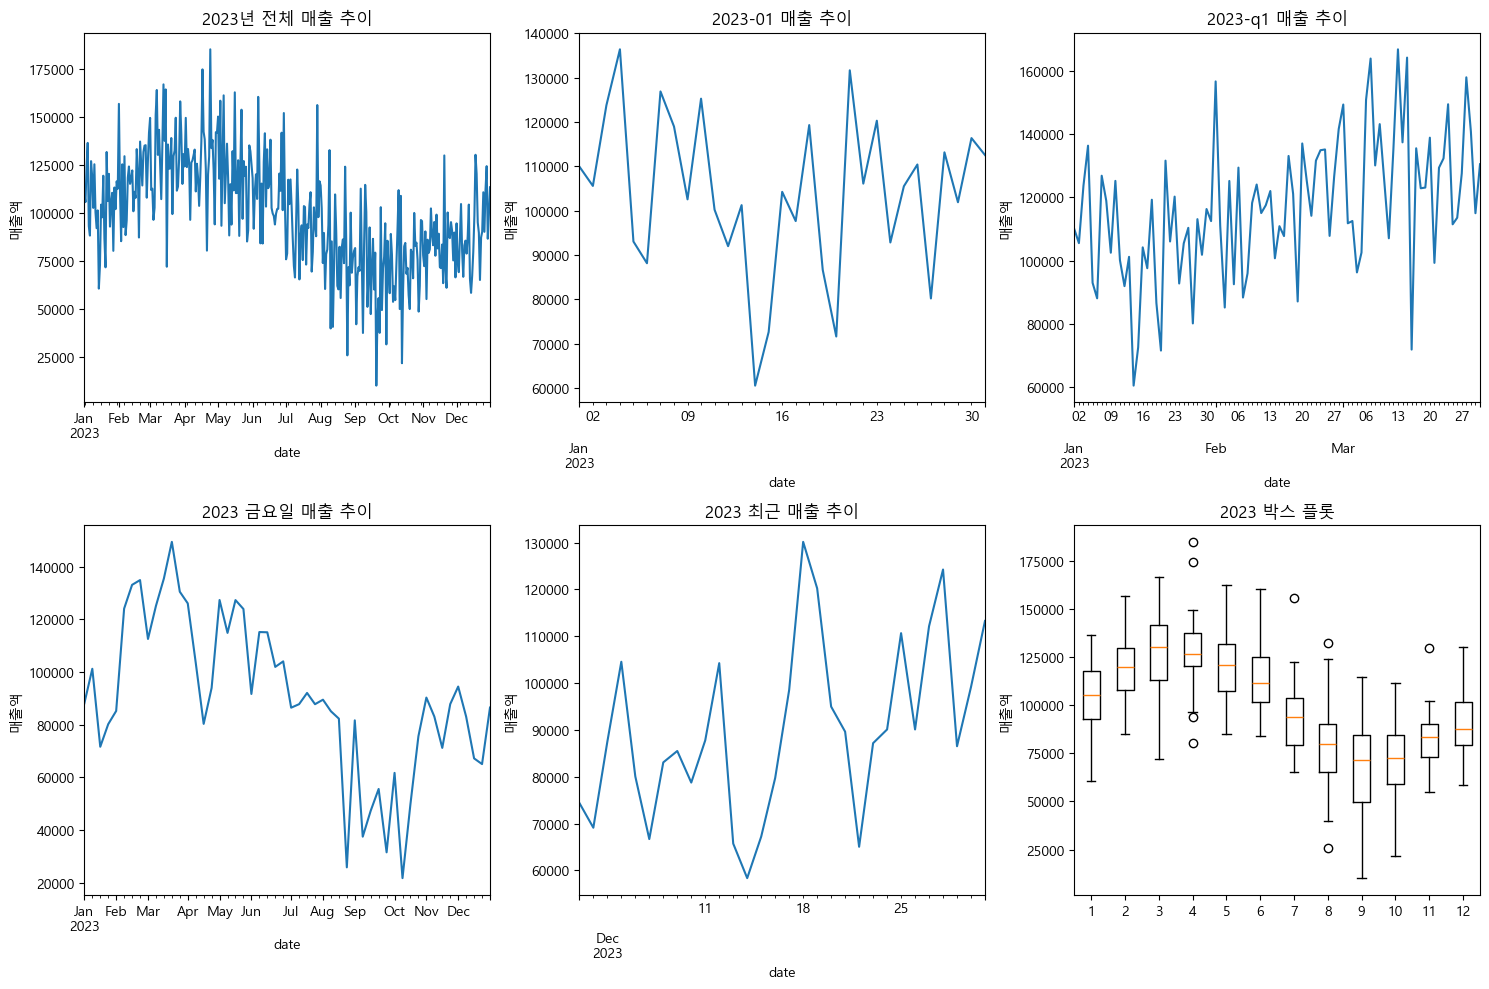

In [46]:
# 시각화
plt.figure(figsize=(15, 10))

# 전체 날짜 매출 데이터
plt.subplot(2, 3, 1)
daily_sales['sales'].plot()
plt.title('2023년 전체 매출 추이')
plt.ylabel('매출액')


# 1월 데이터
plt.subplot(2, 3, 2) # 따로 입력해주지 않으면 한 그래프 안에서 겹쳐 보여줌
jan_data = daily_sales.loc['2023-01']
jan_data['sales'].plot()
plt.title('2023-01 매출 추이')
plt.ylabel('매출액')


# 1월 데이터
plt.subplot(2, 3, 3) 
q1_data = daily_sales[daily_sales['quarter'] == 1]
q1_data['sales'].plot()
plt.title('2023-q1 매출 추이')
plt.ylabel('매출액')

# 금요일 매출 추이
plt.subplot(2, 3, 4) 
friday_data = daily_sales[daily_sales['weekday'] == 4]
friday_data['sales'].plot()
plt.title('2023 금요일 매출 추이')
plt.ylabel('매출액')

# 최근 30일
plt.subplot(2, 3, 5) 
recent_30_data = daily_sales.tail(30)
recent_30_data['sales'].plot()
plt.title('2023 최근 매출 추이')
plt.ylabel('매출액')


# 월별 박스플롯
plt.subplot(2, 3, 6)
all_month = [daily_sales[daily_sales['month'] == m]['sales'].values for m in range(1, 13)]
plt.boxplot(all_month)
plt.title('2023 박스 플롯')
plt.ylabel('매출액')

plt.tight_layout()
plt.show()

In [ ]:
# pip install -q statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 시계열 데이터 추세, 계절성 분해 함수
from statsmodels.tsa.seasonal import seasonal_decompose

In [56]:
# 월 기준으로 리샘플링(시간 간격 재조정)
daily_sales.resample('M')['sales'].mean() #  time series라서 '월'이라는 기준을 알고 있어서 가능

C:\Users\amonm\AppData\Local\Temp\ipykernel_6152\215578595.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily_sales.resample('M')['sales'].mean() #  time series라서 '월'이라는 기준을 알고 있어서 가능


date
2023-01-31    104107.064418
2023-02-28    117734.578352
2023-03-31    128912.491972
2023-04-30    128234.072429
2023-05-31    120658.587866
2023-06-30    113914.972247
2023-07-31     95139.246890
2023-08-31     79330.974225
2023-09-30     69078.105530
2023-10-31     73108.426146
2023-11-30     83359.306665
2023-12-31     90306.009649
Freq: ME, Name: sales, dtype: float64

C:\Users\amonm\AppData\Local\Temp\ipykernel_6152\3948339253.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = daily_sales.resample('M')['sales'].mean()


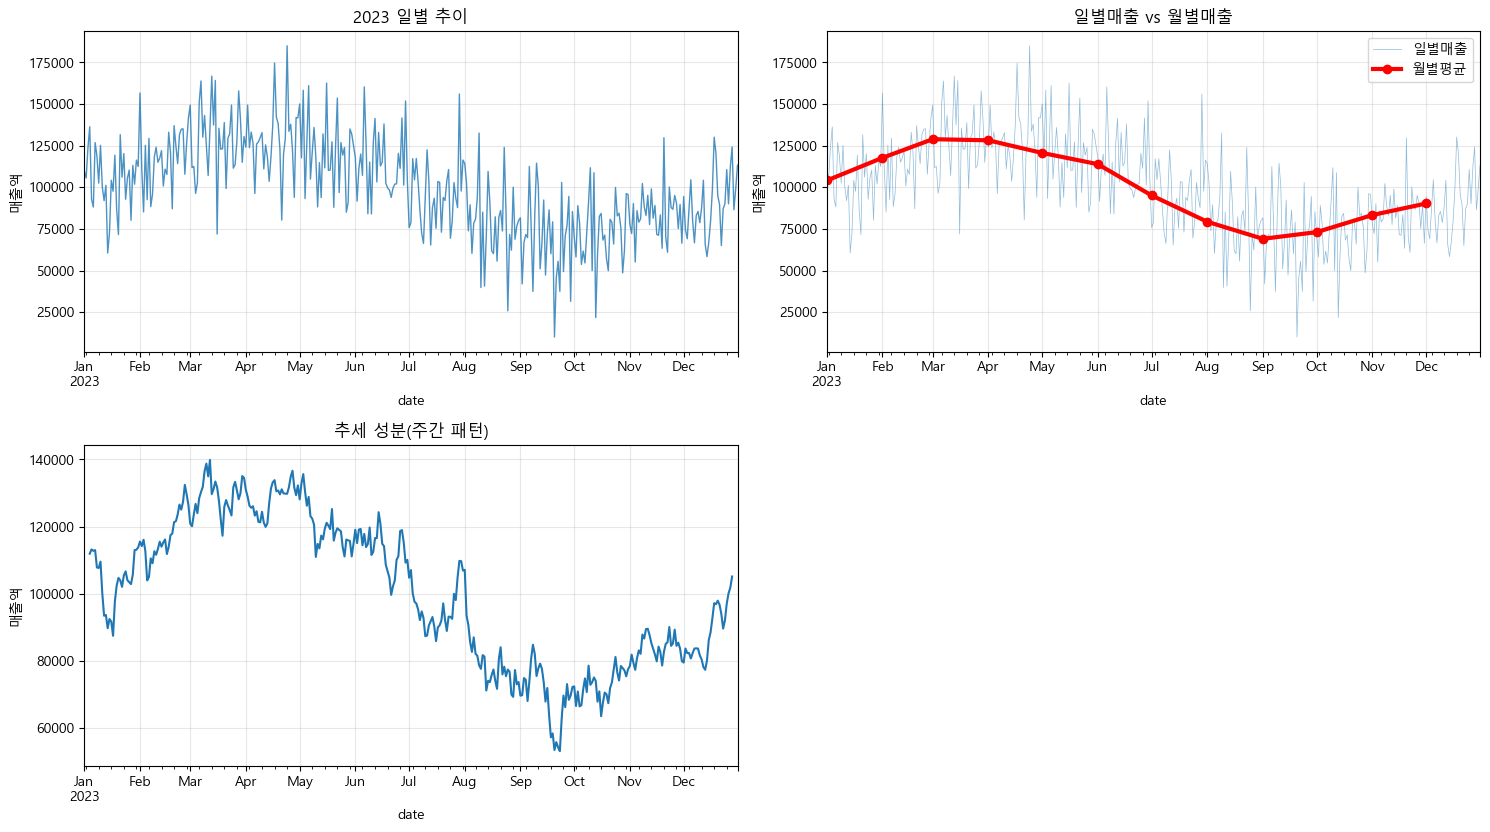

In [ ]:
plt.figure(figsize=(15, 12))

# 전체 추이
plt.subplot(3, 2, 1)
daily_sales['sales'].plot(linewidth=1, alpha=0.8)  # 두께, 투명더
plt.grid(True, alpha=0.3)  # 보조선
plt.title('2023 일별 추이')
plt.ylabel('매출액')

# 월별 평균 같이 보기
plt.subplot(3, 2, 2)
daily_sales['sales'].plot(linewidth=0.5, alpha=0.5, label='일별매출')
# 일단위 -> 월단위 간격 재조정 후 평균내기
monthly_avg = daily_sales.resample('M')['sales'].mean()
monthly_avg.plot(linewidth=3, marker='o', label='월별평균', color='red')
plt.title('일별매출 vs 월별매출')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)
plt.legend()  # 범례 표시 (label 표시)

# 시계열 분해 (Seasonal Decomposition)
# 1. Trend(추세) - 전반적인 방향성(증가/감소) 
# 2. Seasonal(주기적 반복) - 주기적으로 반복되는 패턴
# 3. Residual(잔차) - 추세/계절성을 제거한 나머지 요인(갑작스런 이벤트, 노이즈)
plt.subplot(3, 2, 3) 
decomp = seasonal_decompose(daily_sales['sales'], model='additive', period=7) # 덧셈 모델, 주간 패턴
decomp.trend.plot()
plt.title('추세 성분(주간 패턴)')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()